# 1 - Perkenalan

Nama      : Immanuel Yosia Alfrenco

Batch     : FTDS-015

Dataset   : Uber and Lyft Dataset Boston, MA

Objective : Memprediksi Harga Perjalanan Platform Ride-Hailing dengan Menggunakan Linear Regression.


# 2 - Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Untuk connect Google Drive
from google.colab import drive

# Untuk membuat model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Untuk menyiapkan dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Untuk evaluasi model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# 3 - Data Loading

Kita akan laod dataset yang sudah diupload di Google Drive

In [2]:
# Menghubungkan Colab dengan Google Drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Unzip dataset yang akan digunakan

!unzip gdrive/My\ Drive/Dataset/rideshare_kaggle.csv.zip

Archive:  gdrive/My Drive/Dataset/rideshare_kaggle.csv.zip
replace rideshare_kaggle.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [4]:
# Import data yang akan digunakan

data_ori = pd.read_csv('rideshare_kaggle.csv')

In [5]:
# Duplikasi dataset untuk backup

data = data_ori.copy()

In [6]:
# Mengecek head

data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [7]:
# Mengecek tail

data.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [8]:
# check dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Data yang akan digunakan ternyata memiliki 693071 baris data dan 57 kolom dimana 46 kolom bertipe numerik dan 11 kolom bertipe string/object.

# 4 - Exploratory Data Analysis (EDA)

In [9]:
# check dataset

data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Kita bisa melihat bahwa pada dataset yang digunakan ternyata rata-rata pemesanan dilakukan pada jam 11 siang pada bulan November - Desember dimana hal tersebut menjelaskan rata-rata suhu yang sangat rendah yaitu 39F atau 3 derajat celcius karena sudah memasuki musim dingin di New York. Dataset ini juga menunjukan bahwa Uber dan Lyfe ini kebanyakan hanya digunakan untuk perjalanan yang tidak terlalu jauh yaitu rata-rata hanya 2.1 miles atau sekitar 3.3 km dengan rata-rata harga sebesar 16 dollar atau sekitar 230 ribu rupiah. Kita bisa melihat harga maksimal sangat jauh dari rata-rata, bahkan lumayan jauh dari nilai Q3, kemungkinan itu adalah outliers yang akan kita periksa di tahap selanjutnya.

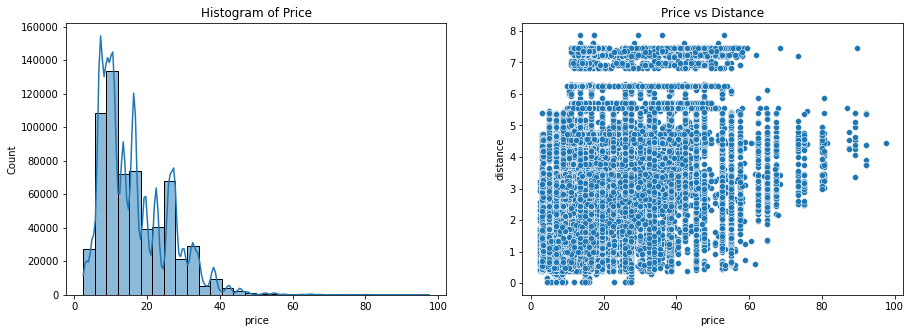

In [10]:
# Membuat visualisasi sederhana

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Histogram of Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='price', y='distance', data=data)
plt.title('Price vs Distance')
plt.show()

Dari visual pertama kita bisa melihat bahwa kebanyakan harga yang terdapat di dataset berada di bawah harga 40 dollar dan mayoritas berada di bawah 20 dollar dan kita bisa lihat persebaran datanya tidak normal atau biasa disebut skewed, dimana pada kasus ini persebarannya adalah right skewed. Dari visual kedua kita bisa melihat bahwa ternyata jarak ternyata lumayan mempengaruhi harga karena kita bisa melihat harga akan mahal jika jarak semakin jauh. Hal ini membuktikan bahwa harga dipengaruhi oleh jarak, namun tidak menutup kemungkinan masih banyak faktor/variabel lain yang mempengaruhi harga.

In [11]:
# Menghitung jumlah data tiap lokasi keberangkatan

data['source'].value_counts()

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64

In [12]:
# Menghitung jumlah data tiap lokasi tujuan

data['destination'].value_counts()

Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64

Dari data di atas kita bisa melihat bahwa lokasi keberangkatan dan tujuan terbanyak ternyata ada di satu lokasi yang sama yaitu `Financial Distric`, yang artinya banyak pekerja yang berangkat dan pulang menggunakan Uber/Lyft.

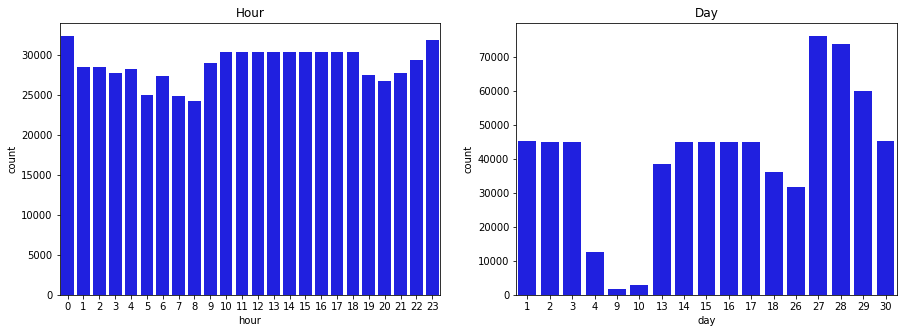

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='hour', data=data, color='b')
plt.title('Hour')
plt.subplot(1, 2, 2)
sns.countplot(x='day', data=data, color='b')
plt.title('Day')
plt.show()

Kita bisa melihat jumlah pemesanan berdasarkan hari dan jam. Pada grafik jam kita bisa melihat terjadi penurunan pesanan dari jam 12 malam hingga jam 8 pagi mungkin dikarenakan masuk jam tidur, namun setelah jam 8 pagi kita bisa melihat pesanan kembali meningkat karena sudah masuk jam kerja. Grafik Day menunjukan bahwa pesanan paling sedikit adalah pada tanggal 9 dan 10, dan pesanan terbanyak adalah pada tanggal 27 dan 28.

In [14]:
# Menghitung jumlah data Uber dan Lyft

data['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [15]:
# Melihat jumlah data tiap bulan

data['month'].value_counts()

12    406614
11    286457
Name: month, dtype: int64

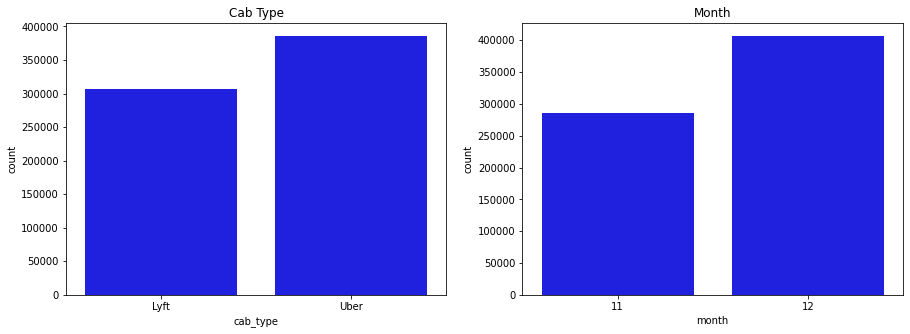

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='cab_type', data=data, color='b')
plt.title('Cab Type')
plt.subplot(1, 2, 2)
sns.countplot(x='month', data=data, color='b')
plt.title('Month')
plt.show()

In [17]:
# Mengecek rata-rata harga Uber dan Lyft

data.groupby(['cab_type','month']).agg({'price':'mean'})

price
cab_type month           
Lyft     11     17.320932
         12     17.372820
Uber     11     15.806008
         12     15.787809

Dari hasil di atas kita bisa menarik beberapa insight. Dari dua pilihan transportasi online, ternyata lebih banyak orang yang memilih menggunakan Uber dibandingkan dengan Lyft. Kita juga bisa melihat ternyata data ini hanya berisi dua bulan yaitu November dan Desember dimana lebih banyak orang menggunakan transportasi online ini di bulan Desember. Kita juga bisa melihat ternyata rata-rata harga Uber lebih murah sekitar 2 dollar dibandingkan dengan harga Lyft yang menunjukan adanya alasan kemungkinan orang lebih banyak menggunakan Uber karena harganya lebih murah.

In [18]:
# Melihat tipe kendaraan yang dimiliki Uber dan Lyft

data.groupby(['cab_type','name']).agg({'name':'count'})

name
cab_type name               
Lyft     Lux           51235
         Lux Black     51235
         Lux Black XL  51235
         Lyft          51235
         Lyft XL       51235
         Shared        51233
Uber     Black         55095
         Black SUV     55096
         Taxi          55095
         UberPool      55091
         UberX         55094
         UberXL        55096
         WAV           55096

In [19]:
# Mengecek rata-rata harga tiap tipe kendaraan yang dimiliki Uber dan Lyft

data.groupby(['cab_type','name']).agg({'price':'mean'})

price
cab_type name                   
Lyft     Lux           17.771240
         Lux Black     23.062468
         Lux Black XL  32.324086
         Lyft           9.610885
         Lyft XL       15.309363
         Shared         6.029893
Uber     Black         20.523786
         Black SUV     30.286763
         Taxi                NaN
         UberPool       8.752500
         UberX          9.765074
         UberXL        15.678144
         WAV            9.765019

Ternyata Lyft memiliki 6 tipe kendaraan sedangkan Uber memiliki 7 tipe kendaraan. Jumlah data tiap tipe kendaraan Lyft sekitar 51200 sedangkan Uber 55000. Tipe kendaraan termahal milik Lyft adalah Lyft Lux Black XL dengan rata-rata harga 32 dollar sedangkan Uber adalah Black SUV dengan rata-rata harga 30 dollar. Uber juga sepertinya bekerja sama dengan taxi namun kita tidak memiliki data harganya mungkin karena data harga taxi masuk ke database taxi bukannya ke database Uber.

In [20]:
data['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

In [21]:
data.groupby(['cab_type','surge_multiplier']).agg({'surge_multiplier':'count'})

surge_multiplier
cab_type surge_multiplier                  
Lyft     1.00                        286433
         1.25                         11085
         1.50                          5065
         1.75                          2420
         2.00                          2239
         2.50                           154
         3.00                            12
Uber     1.00                        385663

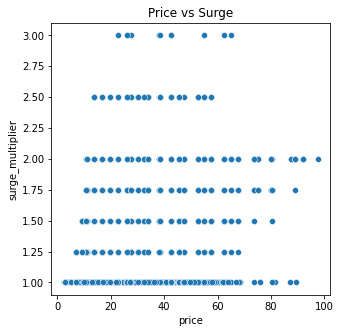

In [22]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='price', y='surge_multiplier', data=data)
plt.title('Price vs Surge')
plt.show()

Surge Multiplier merupakan peningkatan harga yang biasanya disebabkan karena banyaknya permintaan atau order pada suatu waktu tertentu. Lyft memiliki beberapa tingkatan harga dari yang terendah adalah 1x hingga yang tertinggi adalah 3x, sedangkan Uber tidak memiliki Surge Multiplier.

# 5 - Data Preprocessing

## Get data for model inference

In [23]:
# Membuat data inference

data_inf = data.sample(10, random_state=7)
data_inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
91038,cf7b4969-30df-412f-a500-0f7887e18ab0,1.544756e+09,2,14,12,2018-12-14 02:55:07,America/New_York,Boston University,Financial District,Lyft,...,0.0001,1544716800,18.24,1544688000,33.96,1544731200,13.72,1544688000,32.95,1544734800
657385,e9aa2b85-e450-468a-b285-37e8e5027520,1.545099e+09,2,18,12,2018-12-18 02:10:11,America/New_York,Haymarket Square,Theatre District,Uber,...,0.0178,1545066000,34.07,1545044400,41.42,1545076800,28.11,1545044400,35.95,1545076800
285620,5aefeab5-1463-44d5-a1d7-162fec1bb238,1.544876e+09,12,15,12,2018-12-15 12:15:03,America/New_York,Financial District,Boston University,Uber,...,0.0079,1544893200,39.71,1544929200,54.43,1544896800,36.49,1544929200,53.76,1544896800
470599,f6fb73a4-8ce8-4d05-9634-cdf62fe1859d,1.543537e+09,0,30,11,2018-11-30 00:17:56,America/New_York,South Station,Back Bay,Lyft,...,0.0000,1543510800,34.84,1543550400,45.12,1543510800,30.80,1543550400,39.02,1543510800
657627,4bd3e5d4-74e6-47fb-b73f-739ab45df433,1.545067e+09,17,17,12,2018-12-17 17:10:05,America/New_York,Back Bay,Northeastern University,Uber,...,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
569038,65c8838d-9437-4642-858f-491cf51f384a,1.543793e+09,23,2,12,2018-12-02 23:17:58,America/New_York,Northeastern University,Financial District,Lyft,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
678263,94e6d29d-0aa3-4de4-a2f3-05028dfe56f1,1.544777e+09,8,14,12,2018-12-14 08:40:12,America/New_York,Boston University,West End,Lyft,...,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600
26872,aa66b738-37db-4b55-8ec2-41f8a78b43b9,1.544686e+09,7,13,12,2018-12-13 07:25:09,America/New_York,Financial District,South Station,Uber,...,0.0001,1544720400,18.11,1544688000,33.51,1544731200,14.08,1544688000,32.84,1544731200
91712,b20a8aff-0d5b-4470-ba4f-1aaeb95fb2c7,1.543433e+09,19,28,11,2018-11-28 19:29:07,America/New_York,Haymarket Square,Theatre District,Uber,...,0.0000,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800
691446,20ea5620-aa5a-4725-a4bf-9dd743b817b4,1.545147e+09,15,18,12,2018-12-18 15:25:08,America/New_York,Beacon Hill,North End,Uber,...,0.0028,1545152400,23.23,1545192000,38.11,1545109200,11.86,1545134400,31.96,1545109200


In [24]:
# Menghapus inference set dari dataset awal

data = data.drop(data_inf.index)
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


## Splitting Between Train-Set and Test-Set

Kita akan memisahkan data menjadi Train-Set dan juga Test-Set

In [25]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=7)

print("Train Size : ", data_train.shape)
print("Test Size : ", data_test.shape)

Train Size :  (554448, 57)
Test Size :  (138613, 57)


## Handling Missing Values

### Train_set

In [26]:
# Mengecek jumlah missing value tiap kolom pada Train-Set

data_train.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          43963
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Kita bisa melihat jumlah missing value pada Train_Set ada 43963 data, maka selanjutnya kita akan menghapus missing value tersebut.

In [27]:
# Menghapus baris yang memiliki missing value di kolom price

data_train = data_train.dropna(subset = ['price'])

data_test.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          11132
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Sekarang sudah tidak ada lagi missing values pada Train-Set, sehingga kita bisa mulai mengecek missing values pada Test-Set.

### Test-Set

In [28]:
# Mengecek jumlah missing value tiap kolom pada Train-Set

data_test.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          11132
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Kita bisa melihat jumlah missing value pada Train_Set ada 11132 data, maka selanjutnya kita akan menghapus missing value tersebut.

In [29]:
# Menghapus baris yang memiliki missing value di kolom price

data_test = data_test.dropna(subset = ['price'])

data_train.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

## Handling Outliers

Kita akan mengecek apakah ada outliers pada kolom `price` di Train-Set

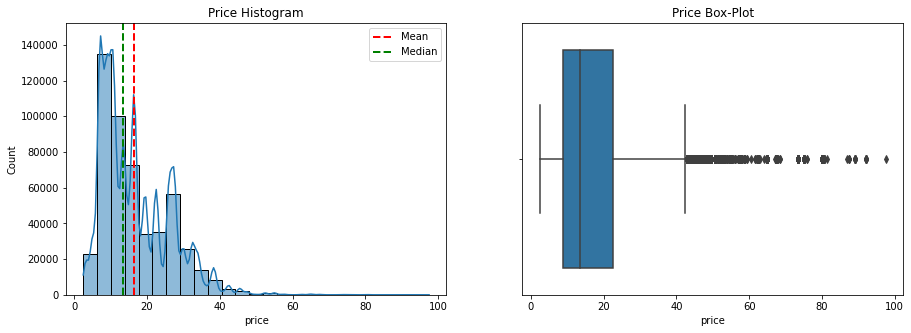

Skewness value :  1.0500985863704118


In [30]:
# Mengecek apakah ada outlier pada kolom price

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(x='price', data=data_train, bins=25, kde=True)
plt.axvline(data_train.price.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data_train.price.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Price Histogram')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(x='price', data=data_train)
plt.title('Price Box-Plot')
plt.show()

print('Skewness value : ', data_train['price'].skew())

Dari visual di atas bisa dilihat bahwa kolom `price` memiliki beberapa outliers. Histogram di atas menunjukan bahwa distribusi data `price` tidak berdistribusi normal. Data tersebut memiliki tipe distribusi skewed, lebih tepatnya right skewed dengan nilai skewness 1.05. Karena bertipe skewed, kita akan menggunakan extreme values analysis.

In [31]:
# Mencari nilai batas atas dan batas bawah dari price

q1 = data_train['price'].quantile(0.25)
q3 = data_train['price'].quantile(0.75)
iqr = q3 - q1

upper = q3 + (iqr * 1.5)
lower = q1 - (iqr * 1.5)
print(f'Nilai upper boundaries = {upper}')
print(f'Nilai lower boundaries = {lower}')

Nilai upper boundaries = 42.75
Nilai lower boundaries = -11.25


In [32]:
# Menghitung jumlah data di luar boundaries

u_count = len(data_train[data_train['price']>upper])
d_count = len(data_train[data_train['price']<lower])
print(f'Jumlah data di atas upper boundaries = {u_count}')
print(f'Jumlah data di bawah lower boundaries = {d_count}')

Jumlah data di atas upper boundaries = 4523
Jumlah data di bawah lower boundaries = 0


Kita menemukan ada 4523 data outlier dalam `price`. Karena model yang kita gunakan adalah model linear, khususnya Linear Regression yang sensitif terhadap outliers, maka outliers tersebut akan kita hapus karena bisa mempengaruhi akurasi prediksi nanti jika dibiarkan.

In [33]:
outlier_price = np.where(data_train['price'] > upper, True,
                       np.where(data_train['price'] < lower, True, False))

data_train_trimmed = data_train.loc[~(outlier_price)]
print(f'Jumlah data sebelum trimming = {data_train.shape}')
print(f'Jumlah data setelah trimming = {data_train_trimmed.shape}')

Jumlah data sebelum trimming = (510485, 57)
Jumlah data setelah trimming = (505962, 57)


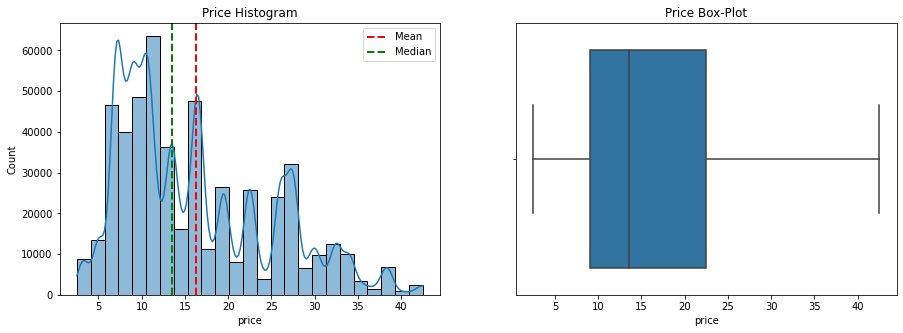

In [34]:
# Mengecek apakah masih ada outlier pada kolom price

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(x='price', data=data_train_trimmed, bins=25, kde=True)
plt.axvline(data_train_trimmed.price.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data_train_trimmed.price.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Price Histogram')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(x='price', data=data_train_trimmed)
plt.title('Price Box-Plot')
plt.show()

Dari visual di atas kita bisa melihat bahwa sudah tidak ada lagi outliers pada `price`. Setelah dilakukan trimming maka sekarang jumlah baris data Train-Set menjadi 505962.

## Features Selection

Kita akan memilih feature yang akan digunakan dengan melakukan perhitungan korelasi antar kolom.

In [35]:
# Memisahkan kolom numeric dan categotical
num_columns = data_train_trimmed.select_dtypes(include=np.number).columns.tolist()
cat_columns = data_train_trimmed.select_dtypes(include=['object']).columns.tolist()

In [36]:
# Mengecek korelasi antar kolom numeric
data_num = data_train_trimmed[num_columns]

data_num.corr()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.027701,-0.341569,0.771207,0.002020,0.003394,0.002577,0.168531,-0.137536,-0.247801,...,-0.211912,0.999364,-0.306674,0.998196,-0.185825,0.999289,-0.377921,0.998288,-0.157186,0.999275
hour,-0.027701,1.000000,0.065577,-0.078869,0.000214,0.002386,0.001377,0.019502,-0.005780,0.218891,...,0.020725,-0.027208,0.015176,-0.026693,0.002764,-0.027698,0.015274,-0.027383,0.002817,-0.027495
day,-0.341569,0.065577,1.000000,-0.861436,-0.000766,-0.000396,-0.000230,0.007927,0.078049,-0.083557,...,0.145277,-0.341498,0.038765,-0.334206,-0.304178,-0.344852,-0.019431,-0.335273,-0.444125,-0.344728
month,0.771207,-0.078869,-0.861436,1.000000,0.001605,0.002053,0.001520,0.085242,-0.126865,-0.081595,...,-0.212957,0.770807,-0.192050,0.765240,0.105182,0.773042,-0.191189,0.766024,0.215215,0.772947
price,0.002020,0.000214,-0.000766,0.001605,1.000000,0.318060,0.141287,0.002132,-0.000473,-0.000342,...,0.000210,0.001986,-0.001683,0.002020,-0.001157,0.001975,-0.002060,0.002009,-0.001294,0.001949
distance,0.003394,0.002386,-0.000396,0.002053,0.318060,1.000000,0.007010,0.000848,-0.000674,-0.003337,...,-0.000544,0.003385,-0.004578,0.003263,-0.004956,0.003401,-0.005132,0.003300,-0.005194,0.003402
surge_multiplier,0.002577,0.001377,-0.000230,0.001520,0.141287,0.007010,1.000000,0.001804,-0.002872,-0.000569,...,-0.000019,0.002558,-0.001044,0.002579,-0.001011,0.002546,-0.001364,0.002508,-0.000874,0.002538
latitude,0.168531,0.019502,0.007927,0.085242,0.002132,0.000848,0.001804,1.000000,-0.532145,-0.098926,...,-0.047182,0.172246,-0.114563,0.170043,-0.109651,0.175595,-0.096429,0.171359,-0.083459,0.173622
longitude,-0.137536,-0.005780,0.078049,-0.126865,-0.000473,-0.000674,-0.002872,-0.532145,1.000000,0.014029,...,0.030191,-0.137446,0.050275,-0.141054,-0.005255,-0.137776,0.011641,-0.141172,-0.020937,-0.136352
temperature,-0.247801,0.218891,-0.083557,-0.081595,-0.000342,-0.003337,-0.000569,-0.098926,0.014029,1.000000,...,0.333610,-0.253539,0.788893,-0.241792,0.780183,-0.252968,0.817069,-0.230616,0.702531,-0.254378


Jika dilihat dari nilai correlation di atas, yang memiliki pengaruh terhadap `price` hanya `distance` dan `surge_multiplier` karena kolom lainnya memiliki nilai correlation mendekati 0.

In [37]:
# Mengecek korelasi antar kolom categorical
data_cat = pd.get_dummies(data_train_trimmed[['price', 'source', 'destination', 'cab_type', 'name']])

data_cat.corr()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
price,1.000000,-0.017797,-0.023996,0.070511,0.056754,0.030113,-0.092288,-0.037516,0.002491,0.043885,...,0.049352,0.218998,0.479925,-0.224259,-0.032697,-0.346257,-0.264139,-0.228590,-0.021202,-0.228226
source_Back Bay,-0.017797,1.000000,-0.090768,-0.090490,-0.090549,-0.090786,-0.091083,-0.091308,-0.090756,-0.090981,...,0.000450,0.000315,0.000388,-0.000584,0.000078,0.000771,-0.000214,0.000375,-0.000141,-0.000601
source_Beacon Hill,-0.023996,-0.090768,1.000000,-0.090407,-0.090466,-0.090702,-0.090999,-0.091224,-0.090673,-0.090897,...,-0.000293,0.001441,0.002102,-0.000670,-0.000402,0.000135,-0.000818,-0.000253,-0.000466,-0.000546
source_Boston University,0.070511,-0.090490,-0.090407,1.000000,-0.090189,-0.090424,-0.090721,-0.090945,-0.090395,-0.090619,...,0.000419,-0.000328,-0.003859,0.000568,0.000915,-0.000309,0.001255,0.001490,0.000055,0.000918
source_Fenway,0.056754,-0.090549,-0.090466,-0.090189,1.000000,-0.090483,-0.090780,-0.091004,-0.090454,-0.090678,...,0.000233,-0.001199,-0.004177,0.000750,0.001652,0.000321,-0.000306,0.000667,0.000657,-0.000388
source_Financial District,0.030113,-0.090786,-0.090702,-0.090424,-0.090483,1.000000,-0.091017,-0.091242,-0.090690,-0.090915,...,0.002673,0.002120,-0.011095,0.002894,0.002195,0.003487,0.002877,0.001159,0.001329,0.002161
source_Haymarket Square,-0.092288,-0.091083,-0.090999,-0.090721,-0.090780,-0.091017,1.000000,-0.091541,-0.090987,-0.091213,...,-0.000465,-0.000101,0.005511,-0.000660,-0.001544,-0.000041,-0.001812,-0.000389,-0.000422,-0.000376
source_North End,-0.037516,-0.091308,-0.091224,-0.090945,-0.091004,-0.091242,-0.091541,1.000000,-0.091212,-0.091438,...,-0.000163,0.000361,0.004812,-0.001639,-0.000873,-0.000577,-0.001045,-0.001896,-0.000136,-0.001000
source_North Station,0.002491,-0.090756,-0.090673,-0.090395,-0.090454,-0.090690,-0.090987,-0.091212,1.000000,-0.090885,...,-0.000561,-0.000278,0.004638,-0.001594,-0.000434,-0.000526,0.000422,-0.000510,-0.000368,-0.001107
source_Northeastern University,0.043885,-0.090981,-0.090897,-0.090619,-0.090678,-0.090915,-0.091213,-0.091438,-0.090885,1.000000,...,-0.000177,-0.001180,-0.002132,0.001305,-0.000601,-0.000432,0.001012,-0.000349,0.000175,-0.000311


Jika dilihat dari nilai correlation di atas, yang memiliki pengaruh terhadap `price` hanya kolom `name` karena kolom lainnya memiliki nilai correlation mendekati 0.

Dari perhitungan correlation di atas, kita bisa memilih feature yang digunakan untuk train model dimana kita akan menggunakan kolom yang memiliki hubungan dengan `price` yaitu `name`, `distance`, dan `surge_multiplier`.

## Splitting between `X` (Features) and `y` (Targets)

In [38]:
# Memisahkan `X` (Features) dan `y` (Targets)
X_train = data_train_trimmed[['name', 'distance', 'surge_multiplier']]
y_train = data_train_trimmed['price']

X_test = data_test[['name', 'distance', 'surge_multiplier']]
y_test = data_test['price']

print("Train Size : ", X_train.shape)
print("Test Size : ", X_test.shape)

Train Size :  (505962, 3)
Test Size :  (127481, 3)


## Split between Numerical Columns and Categorical Columns

In [39]:
# Mendapatkan list Numerical columns dan Categorical columns

num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_cols)
print('Categorical Columns : ', cat_cols)

Numerical Columns :  ['distance', 'surge_multiplier']
Categorical Columns :  ['name']


In [40]:
# Memisahkan Train-set and Test-set berdasarkan tipe kolomnya

X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

## Features Scaling

Kita akan melakukan scaling pada kolom numeric di Train-Set yaitu kolom `distance` dan `surge_multiplier`

In [41]:
X_train_num

,distance,surge_multiplier
340506,0.92,1.0
72618,3.44,1.0
404766,0.91,1.0
140619,2.15,1.0
27244,2.82,1.0
...,...,...
328603,0.55,1.0
535035,2.79,1.0
573983,1.50,1.0
189639,3.41,1.0


In [42]:
X_train_num.describe()

,distance,surge_multiplier
count,505962.000000,505962.000000
mean,2.173290,1.012295
std,1.116413,0.083609
min,0.020000,1.000000
25%,1.270000,1.000000
50%,2.140000,1.000000
75%,2.900000,1.000000
max,7.860000,3.000000


In [43]:
# Feature scaling menggunakan MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num) #.fit hanya di Train-Set

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.11479592, 0.        ],
       [0.43622449, 0.        ],
       [0.11352041, 0.        ],
       ...,
       [0.18877551, 0.        ],
       [0.43239796, 0.        ],
       [0.18367347, 0.        ]])

Setelah mendapatkan hasil scaling maka akan kita ubah lagi menjadi bentuk dataframe.

In [44]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_cols)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_cols)
X_train_num_scaled

,distance,surge_multiplier
0,0.114796,0.0
1,0.436224,0.0
2,0.113520,0.0
3,0.271684,0.0
4,0.357143,0.0
...,...,...
505957,0.067602,0.0
505958,0.353316,0.0
505959,0.188776,0.0
505960,0.432398,0.0


## Feature Encoding

In [45]:
X_train_cat

,name
340506,Black
72618,Lyft
404766,WAV
140619,Lux Black
27244,UberXL
...,...
328603,Black SUV
535035,Black
573983,Black
189639,Lyft XL


Kita akan melakukan encoding terhadap kolom `name`

In [46]:
# Feature encoding menggunakan OneHotEndoder

encoder = OneHotEncoder()
encoder.fit(X_train_cat) #.fit hanya di Train-Set

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

<505962x12 sparse matrix of type '<class 'numpy.float64'>'
	with 505962 stored elements in Compressed Sparse Row format>

Setelah mendapatkan hasil encoding maka akan kita ubah lagi menjadi dataframe.

In [47]:
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))
X_train_cat_encoded 

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
505957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505958,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505959,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505960,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Concat between Numerical Columns and Categorical Columns

Menggabungkan hasil scaling dan encoding menjadi satu dataframe untuk di training.

In [48]:
# Concat Numerical Columns dan Categorical Columns

X_train_final = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.114796,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.436224,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.113520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.271684,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.357143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505957,0.067602,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505958,0.353316,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505959,0.188776,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505960,0.432398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
X_test_final

,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.385204,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.066327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.289541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.724490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.085459,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127476,0.359694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
127477,0.377551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
127478,0.336735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
127479,0.366071,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6 - Model Definition

In [50]:
# Mendefinisikan model menggunakan Linear Regression dan Polynomial Features

model_lin_reg = LinearRegression()
poly_model_2 = make_pipeline(PolynomialFeatures(2), LinearRegression())

# 7 - Model Training

In [51]:
# Training model

%time model_lin_reg.fit(X_train_final, y_train)
%time poly_model_2.fit(X_train_final, y_train)

CPU times: user 327 ms, sys: 114 ms, total: 441 ms
Wall time: 350 ms
CPU times: user 11.2 s, sys: 1.16 s, total: 12.4 s
Wall time: 8.01 s


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Kita bisa melihat waktu training yang dibutuhkan untuk train tiap model. Waktu untuk train model menggunakan polynomial features lebih lama daripada model linear regression biasa.

# 8 - Model Evaluation

Setelah melakukan training sekarang kita akan melakukan evaluasi terhadap model yang sudah kita ciptakan dimana pengukuranya akan menggunakan Mean Absolute Error (MAE) dan R2 Score.

In [52]:
# Predict Train_Set and Test_Set
# Linear Regression Model
linreg_y_pred_train = model_lin_reg.predict(X_train_final)
linreg_y_pred_test = model_lin_reg.predict(X_test_final)
# Linear Regression with 2 Polynomial Features
poly2_y_pred_train = poly_model_2.predict(X_train_final)
poly2_y_pred_test = poly_model_2.predict(X_test_final)

## Linear Regression Model

In [53]:
# Model Evaluation Using MAE and R2
print('Linear Regression Model')
print('')
print('Train-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_train, linreg_y_pred_train))
print(f'Train-Set R2 Score: {r2_score(y_train, linreg_y_pred_train):.2f}')
print('')
print('Test-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_test, linreg_y_pred_test))
print(f'Test-Set R2 Score: {r2_score(y_test, linreg_y_pred_test):.2f}')

Linear Regression Model

Train-Set Mean Absolute Error (MAE):  1.6785786599339474
Train-Set R2 Score: 0.93

Test-Set Mean Absolute Error (MAE):  1.7513467448090305
Test-Set R2 Score: 0.93


## Linear Regression Model with 2-Degree Polynomial Features 

In [54]:
# Model Evaluation Using MAE and R2
print('Linear Regression Model with 2-Degree Polynomial Features')
print('')
print('Train-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_train, poly2_y_pred_train))
print(f'Train-Set R2 Score: {r2_score(y_train, poly2_y_pred_train):.2f}')
print('')
print('Test-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_test, poly2_y_pred_test))
print(f'Test-Set R2 Score: {r2_score(y_test, poly2_y_pred_test):.2f}')

Linear Regression Model with 2-Degree Polynomial Features

Train-Set Mean Absolute Error (MAE):  1.2655288471515649
Train-Set R2 Score: 0.96

Test-Set Mean Absolute Error (MAE):  1.3021272057821363
Test-Set R2 Score: 0.96


## Model Analysis


Dari hasil evaluasi dua model di atas kita bisa melihat bahwa model yang kita train termasuk model yang cukup bagus karena nilai dari MAE sangat kecil dan juga tidak terjadi perbedaan yang cukup signifikan antara hasil evaluasi Train-Set dan Test-Set. Model menggunakan **Linear Regression** biasa memperoleh hasil yang cukup bagus meskipun lebih rendah daripada Linear Regression yang menggunakan Polynomial Feature, dimana pada **Train-Set** mendapatkan nilai **MAE 1.678 dan R2 Score 0.93** sedangkan pada **Test-Set** mendapatkan nilai **MAE 1.751 dan R2 Score 0.93**. Untuk Model **Linear Regression dengan Polynomial Feature** memperoleh hasil yang lebih bagus dari Linear Regression biasa dimana pada **Train-Set** mendapatkan nilai **MAE 1.265 dan R2 Score 0.96** sedangkan pada **Test-Set** mendapatkan nilai **MAE 1.302 dan R2 Score 0.96**. Linear Regression dengan Polynomial Feature mendapatkan nilai yang lebih baik namun waktu yang digunakan untuk train sedikit lebih lama daripada Linear Regression biasa.

# 9 - Model Inference

## Inferencing

Sebelum melakukan evaluasi pada Inference Set, kita akan melakukan tahapan preprocessing yang sama dengan yang dilakukan pada Test-Set. Kita akan memisahkan kolom numerical dan categorical dan setelah itu akan dilakukan encoding dan scaling sebelum akhirnya akan disatukan lagi untuk dilakukan evaluasi.

In [55]:
# Display inference set

data_inf.reset_index(drop=True, inplace=True)
data_inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,cf7b4969-30df-412f-a500-0f7887e18ab0,1.544756e+09,2,14,12,2018-12-14 02:55:07,America/New_York,Boston University,Financial District,Lyft,...,0.0001,1544716800,18.24,1544688000,33.96,1544731200,13.72,1544688000,32.95,1544734800
1,e9aa2b85-e450-468a-b285-37e8e5027520,1.545099e+09,2,18,12,2018-12-18 02:10:11,America/New_York,Haymarket Square,Theatre District,Uber,...,0.0178,1545066000,34.07,1545044400,41.42,1545076800,28.11,1545044400,35.95,1545076800
2,5aefeab5-1463-44d5-a1d7-162fec1bb238,1.544876e+09,12,15,12,2018-12-15 12:15:03,America/New_York,Financial District,Boston University,Uber,...,0.0079,1544893200,39.71,1544929200,54.43,1544896800,36.49,1544929200,53.76,1544896800
3,f6fb73a4-8ce8-4d05-9634-cdf62fe1859d,1.543537e+09,0,30,11,2018-11-30 00:17:56,America/New_York,South Station,Back Bay,Lyft,...,0.0000,1543510800,34.84,1543550400,45.12,1543510800,30.80,1543550400,39.02,1543510800
4,4bd3e5d4-74e6-47fb-b73f-739ab45df433,1.545067e+09,17,17,12,2018-12-17 17:10:05,America/New_York,Back Bay,Northeastern University,Uber,...,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
5,65c8838d-9437-4642-858f-491cf51f384a,1.543793e+09,23,2,12,2018-12-02 23:17:58,America/New_York,Northeastern University,Financial District,Lyft,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
6,94e6d29d-0aa3-4de4-a2f3-05028dfe56f1,1.544777e+09,8,14,12,2018-12-14 08:40:12,America/New_York,Boston University,West End,Lyft,...,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600
7,aa66b738-37db-4b55-8ec2-41f8a78b43b9,1.544686e+09,7,13,12,2018-12-13 07:25:09,America/New_York,Financial District,South Station,Uber,...,0.0001,1544720400,18.11,1544688000,33.51,1544731200,14.08,1544688000,32.84,1544731200
8,b20a8aff-0d5b-4470-ba4f-1aaeb95fb2c7,1.543433e+09,19,28,11,2018-11-28 19:29:07,America/New_York,Haymarket Square,Theatre District,Uber,...,0.0000,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800
9,20ea5620-aa5a-4725-a4bf-9dd743b817b4,1.545147e+09,15,18,12,2018-12-18 15:25:08,America/New_York,Beacon Hill,North End,Uber,...,0.0028,1545152400,23.23,1545192000,38.11,1545109200,11.86,1545134400,31.96,1545109200


In [56]:
# Memisahkan Numerical Columns dan Categorical Columns Data Inference

data_inf_num = data_inf[num_cols]
data_inf_cat = data_inf[cat_cols]

In [57]:
# Scaling dan Encoding pada Data Inference

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_encoded = encoder.transform(data_inf_cat)

In [58]:
# Merubah kembali ke bentuk dataframe

data_inf_cat_encoded_df = pd.DataFrame(data_inf_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))
data_inf_num_scaled_df = pd.DataFrame(data_inf_num_scaled, columns=num_cols)

In [59]:
# Concate Numerical Columns dan Categorical Columns

data_inf_final = pd.concat([data_inf_num_scaled_df, data_inf_cat_encoded_df], axis=1)
data_inf_final

,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.553571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.145408,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.706633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.404337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.153061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.539541,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.390306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.047194,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.145408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.169643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
# Predict dengan model Linear Regression dan Linear Regression with Polynomial Features

y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf_poly2 = poly_model_2.predict(data_inf_final)

In [61]:
# Membuat Dataframe Harga Prediction

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price Prediction'])
y_pred_inf_poly_df = pd.DataFrame(y_pred_inf_poly2, columns=['Price Prediction 2'])
pred_inf = pd.concat([data_inf['price'], y_pred_inf_df, y_pred_inf_poly_df], axis=1)
pred_inf

,price,Price Prediction,Price Prediction 2
0,34.0,28.171875,32.168945
1,17.0,17.757812,16.599609
2,24.0,24.625000,25.687500
3,26.0,25.046875,26.811523
4,8.0,7.171875,8.288086
5,32.5,27.875000,31.664062
6,16.5,17.156250,17.631836
7,27.5,25.281250,24.278320
8,8.5,7.007812,8.198242
9,15.5,7.515625,8.485352


Setelah mendapatkan hasil prediksi, kita bisa melakukan evaluasi model yang digunakan dengan Mean Absolute Error (MAE) dan R2 Score.

In [62]:
# Model Evaluation dengan MAE and R2
print('Linear Regression Model')
print('')
print('Inference-Set Mean Absolute Error (MAE): ', mean_absolute_error(data_inf['price'], y_pred_inf))
print(f'Inference-Set R2 Score: {r2_score(data_inf.price, y_pred_inf):.2f}')

Linear Regression Model

Inference-Set Mean Absolute Error (MAE):  2.596875
Inference-Set R2 Score: 0.83


In [63]:
# Model Evaluation dengan MAE and R2
print('Linear Regression Model with 2-Degree Polynomial Features')
print('')
print('Inference-Set Mean Absolute Error (MAE): ', mean_absolute_error(data_inf['price'], y_pred_inf_poly2))
print(f'Inference-Set R2 Score: {r2_score(data_inf.price, y_pred_inf_poly2):.2f}')

Linear Regression Model with 2-Degree Polynomial Features

Inference-Set Mean Absolute Error (MAE):  1.75244140625
Inference-Set R2 Score: 0.91


Hasil evaluasi pada Inference-Set menunjukan hasil yang lumayan bagus. Model Linear Regression dengan Polynomial Features berhasil mengalahkan Linear Regression biasa lagi. Linear Regression biasa pada **Inference-Set** mendapatkan nilai **MAE 2.597 dan R2 Score 0.83** sedangkan ntuk Model **Linear Regression dengan Polynomial Feature** memperoleh hasil yang lebih bagus dimana pada **Inference-Set** mendapatkan nilai **MAE 1.752 dan R2 Score 0.91**.

# 10 - Kesimpulan

Dataset yang digunakan ini berisi data perjalanan transportasi online di Amerika khususnya Uber dan Lyft. Data ini menyimpan detail perjalanan Uber dan Lyft pada bulan November dan juga Desember dimana di Amerika sudah memasuki musim dingin dengan rata-rata suhu sekitar 39.5°F atau sekitar 4.17°C. Dataset ini juga menunjukan bahwa Uber dan Lyfe ini kebanyakan hanya digunakan untuk perjalanan yang tidak terlalu jauh yaitu rata-rata hanya 2.1 miles atau sekitar 3.3 km dengan rata-rata harga sebesar 16 dollar atau sekitar 230 ribu rupiah. Dataset ini juga memiliki destinasi awal dan destinasi tujuan dimana paling banyak adalah Financial Distric atau perkantoran yang artinya Uber dan Lyft banyak digunakan untuk berangkat/pulang kerja.

Menggunakan perhitungan korelasi kita bisa melihat hanya ada 3 aspek yang menjadi pengaruh terhadap perhitungan harga yaitu jarak, surge (peningkatan harga), dan juga tipe kendaraan. Tipe kendaraan tiap perusahaan berbeda jumlahnya dan juga harganya, dimana untuk Lyft tipe termurah adalah shared dan tipe termahalnya adalah Lux Black XL, sedangkan untuk Uber tipe termurahnya adalah UberPool dan tipe termahalnya adalah Black SUV.

Dari ketiga kolom yang mempengaruhi harga, kita membuat 2 model menggunakan Linear Regression biasa dan Linear Regression dengan Polynomial Feature Derajat-2 dimana hasil evaluasi untuk Train-Set, Test-Set, dan juga Inference-Set cukup bagus karena nilai Mean Absolute Error (MAE) cukup kecil dan nilai R2 Score cukup tinggi. **Linear Regression biasa** pada **Test-Set** mendapatkan nilai **MAE 1.751 dan R2 Score 0.93** sedangkan pada **Inference-Set** mendapatkan nilai **MAE 2.597 dan R2 Score 0.83**. **Linear Regression dengan Polynomial Feature Derajat-2** pada **Test-set** mendapatkan nilai **MAE 1.302 dan R2 Score 0.96** sedangkan pada **Inference-Set** mendapatkan nilai **MAE 1.752 dan R2 Score 0.91.**

Jadi dari kedua model yang dibuat, model yang memiliki performa lebih baik adalah **Linear Regression dengan Polynomial Feature Derajat-2**

# 11 - Pertanyaan

## Soal 1

Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !


*   Asumsi Normalitas : artinya data harus berdistribusi normal untuk mendapatkan model linear regresi yang bagus.
*   Asumsi Multikoliniertas : artinya tidak boleh ada variabel/features yang berhubungan atau berkorelasi dengan variabel/features yang lain.
*   Asumsi Heteroskedatisitas : artinya model linear regresi ini harus memiliki varian yang konstan (konstanta).
*   Asumsi Autokorelasi : artinya tidak boleh ada komponen/nilai yang berkorelasi berdasarkan waktu (urutan waktu)dengan himpunanya sendiri.

Informasi diperoleh dari : https://scundip.org/uncategorized/analisis-regresi-sederhana/

## Soal 2

Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

In [64]:
# Get intercept and slope

print('Model Intercept : ', model_lin_reg.intercept_)
print('Slope : ', model_lin_reg.coef_)

Model Intercept :  -44560133035713.01
Slope :  [2.09261917e+01 2.73850311e+01 4.45601330e+13 4.45601330e+13
 4.45601330e+13 4.45601330e+13 4.45601330e+13 4.45601330e+13
 4.45601330e+13 4.45601330e+13 4.45601330e+13 4.45601330e+13
 4.45601330e+13 4.45601330e+13]


Intercept/Coefficient merupakan konstanta yang diperoleh dari rata-rata `y` (Target) apabila nilai `X` adalah 0, sedangkan Slope adalah suatu nilai yang menunjukkan seberapa besar kontribusi/pengaruh yang diberikan suatu variabel `X` terhadap variabel `y`. Semakin besar nilai Slope maka semakin berpengaruh variabel tersebut terhadap nilai `y`.